# S.I.R. Model

- Susceptible
- Infectious
- Recovered

## Compartmental Models

- Divide population into compartments based on some state or characteristic
- A person is in one and only one compartment at a time

## The SIR Model

We track the following three compartments, which must sum to N(t), the total population at time t.

$$S(t) + I(t) + R(t) = N(t)$$

- Inside a compartment, all individuals are assumed to be homogeneous and have the same characteristics.

This is a gross simplification of real-world dynamics. In reality, individuals may move between compartments in more complex ways, and factors such as age, social behavior, and vaccination status can influence disease spread.

- If a S comes into contact with only other S individuals, or R individuals, they remain S.
- Contact with an I individual is required to go from S to I.


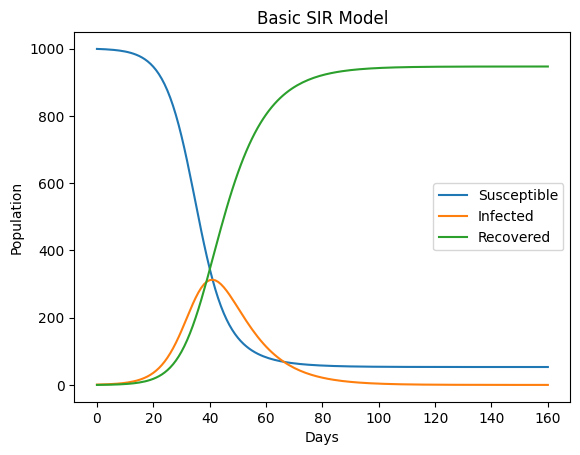

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# parameters
N = 1000        # we let N represent the total population
I0 = 1          # we let I0 represent the initial infected
R0 = 0          # R0 represents the recovered population
S0 = N - I0 - R0  # S0 is calculated as the initial susceptible population (S0 = N - I0 - R0 = 999)

beta = 0.3      # infection rate
gamma = 0.1     # recovery rate
days = 160      # simulation days (length of the simulation)

# SIR model differential EQs
def sir_step(S, I, R, beta, gamma, N):
    new_infected = beta * S * I / N
    new_recovered = gamma * I
    S_next = S - new_infected
    I_next = I + new_infected - new_recovered
    R_next = R + new_recovered
    return S_next, I_next, R_next

S, I, R = [S0], [I0], [R0]

for _ in range(days):
    s, i, r = sir_step(S[-1], I[-1], R[-1], beta, gamma, N)
    S.append(s)
    I.append(i)
    R.append(r)

plt.plot(S, label='Susceptible')
plt.plot(I, label='Infected')
plt.plot(R, label='Recovered')
plt.xlabel('Days')
plt.ylabel('Population')
plt.legend()
plt.title('Basic SIR Model')
plt.show()